# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# building partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
response= requests.get(query_url+"london").json()
display(response)

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 47.71,
  'feels_like': 44.71,
  'temp_min': 46.99,
  'temp_max': 48.99,
  'pressure': 1008,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 267, 'gust': 13},
 'clouds': {'all': 58},
 'dt': 1603927556,
 'sys': {'type': 3,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1603867648,
  'sunset': 1603903253},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# setup empty list to hold response
city_weather = []
# look through list of cities. Perform request for weather data for each city.
for city in cities:
    response_variable = requests.get(query_url+city).json()

# try and except 
    try:
        weather_dictionary= {
            "City": response_variable["name"],
            "Lat": response_variable["coord"]["lat"],
            "Long": response_variable["coord"]["lon"],
            "Max Temp": response_variable["main"]["temp_max"],
            "Humidity": response_variable["main"]["humidity"],
            "Cloudiness": response_variable["clouds"]["all"],
            "Wind Speed": response_variable["wind"]["speed"],
            "Country": response_variable["sys"]["country"],
            "Date": response_variable["dt"]
        }
        city_weather.append(weather_dictionary)
        print(f"City name is {response_variable['name']} and id is {response_variable['id']}.")
    except:
        print("did not find")

City name is Ushuaia and id is 3833367.
City name is Punta Arenas and id is 3874787.
City name is East London and id is 1006984.
City name is Doctor Arroyo and id is 4011873.
City name is Berbera and id is 64435.
did not find
City name is New Norfolk and id is 2155415.
City name is Atuona and id is 4020109.
City name is Tazovsky and id is 1489853.
City name is Henties Bay and id is 3356832.
City name is Fairbanks and id is 5861897.
City name is Ouidah and id is 2392308.
City name is Busselton and id is 2075265.
City name is Arraial do Cabo and id is 3471451.
City name is Abu Samrah and id is 172515.
City name is Lac du Bonnet and id is 6014443.
City name is Pangnirtung and id is 6096551.
City name is Camopi and id is 3382226.
City name is Hermanus and id is 3366880.
City name is Albany and id is 5106841.
did not find
City name is Pemangkat and id is 1631637.
City name is Provideniya and id is 4031574.
City name is Manokwari and id is 1636308.
City name is Mataura and id is 6201424.
Cit

City name is Oudtshoorn and id is 967106.
did not find
City name is São João da Barra and id is 3448903.
City name is Nikolskoye and id is 546105.
City name is Lorengau and id is 2092164.
City name is San Andrés and id is 3670218.
City name is Bahía Solano and id is 3689325.
City name is Katherine and id is 2068655.
City name is Fare and id is 4034496.
City name is Ust-Tsilma and id is 477940.
City name is Mahanoro and id is 1062553.
City name is Saskylakh and id is 2017155.
City name is Clyde River and id is 5924351.
City name is Makariv and id is 702337.
City name is Half Moon Bay and id is 5354943.
City name is Biu and id is 2346995.
City name is Miranda and id is 3674702.
City name is Muros and id is 3115824.
City name is Kruisfontein and id is 986717.
City name is Comodoro Rivadavia and id is 3860443.
City name is Trairi and id is 3386177.
did not find
City name is Tierralta and id is 3667158.
City name is Salima and id is 924055.
City name is Pevek and id is 2122090.
City name is

City name is Beringovskiy and id is 2126710.
City name is Jucás and id is 3397119.
City name is Karaidel' and id is 552862.
City name is Zanjān and id is 111453.
City name is Fort Saint James and id is 5881688.
did not find
City name is Solnechnyy and id is 2016307.
City name is Manono and id is 209598.
City name is Along and id is 1278969.
City name is Katsuura and id is 2112309.
City name is Cabadiangan and id is 1722028.
did not find
did not find
City name is Laguna and id is 5364271.
City name is Fort Nelson and id is 5955902.
City name is Kuching and id is 1735634.
City name is Kiunga and id is 2093846.
City name is Svarstad and id is 7626348.
City name is Tokur and id is 2015217.
City name is Port Hardy and id is 6111862.
City name is Vao and id is 2137773.
City name is Kemijärvi and id is 653272.
City name is Pokhvistnevo and id is 507624.
did not find
City name is Baruun-Urt and id is 2032614.
City name is Souillac and id is 933995.
City name is Kilrush and id is 2963218.
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_df = pd.DataFrame(city_weather)
city_df.head()
city_df.to_csv("city_df.csv")
display(city_df)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,39.43,85,48,4.74,AR,1603927261
1,Punta Arenas,-53.15,-70.92,48.00,66,89,25.99,CL,1603927812
2,East London,-33.02,27.91,67.84,84,97,1.70,ZA,1603927813
3,Doctor Arroyo,23.67,-100.18,73.65,23,0,5.44,MX,1603927813
4,Berbera,10.44,45.01,80.15,64,9,5.97,SO,1603927813
...,...,...,...,...,...,...,...,...,...
548,Manjacaze,-24.71,33.88,67.24,95,0,7.20,MZ,1603927922
549,Prince Rupert,54.32,-130.32,44.60,81,100,9.17,CA,1603927853
550,Olafsvik,64.89,-23.71,42.37,71,14,26.46,IS,1603927922
551,Valença,-13.37,-39.07,75.76,93,100,4.34,BR,1603927759


In [13]:
city_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,18.755750,13.804322,59.079602,73.965642,53.356239,6.908156,1.603928e+09
std,32.665198,87.538280,21.611683,20.809451,39.349899,5.203132,9.128068e+01
min,-54.800000,-175.200000,-13.700000,1.000000,0.000000,0.290000,1.603927e+09
25%,-8.120000,-62.950000,45.000000,64.000000,9.000000,3.000000,1.603928e+09
50%,19.880000,18.420000,64.990000,80.000000,59.000000,5.530000,1.603928e+09
75%,47.500000,88.400000,77.130000,90.000000,94.000000,9.800000,1.603928e+09
max,78.220000,179.320000,91.530000,100.000000,100.000000,34.490000,1.603928e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity = city_df.loc[city_df["Humidity"] > 100]
humidity

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## I did not find any city that have > 100 humidity

In [16]:
#  Get the indices of cities that have humidity over 100%.
N/A

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

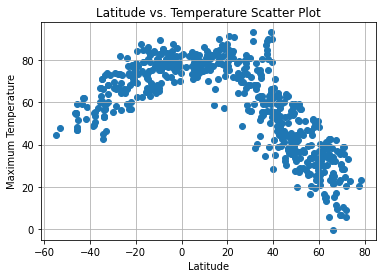

In [13]:
plt.scatter(city_df["Lat"],city_df["Max Temp"])
plt.grid()
plt.title("Latitude vs. Temperature Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.savefig("Figure 1.png")
plt.show()

In [14]:
#city_df.plot(kind="scatter")

## Latitude vs. Humidity Plot

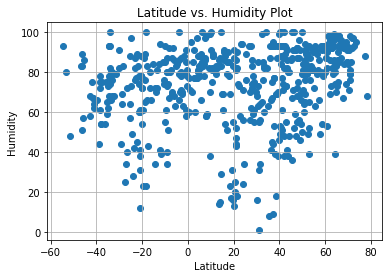

In [20]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.grid()
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Figure 2.png")
plt.show()

## Latitude vs. Cloudiness Plot

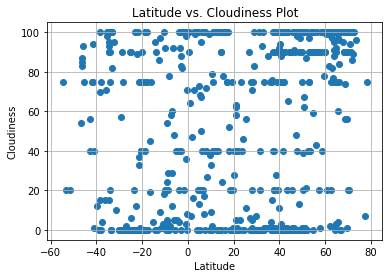

In [22]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.grid()
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Figure 3.png")
plt.show()

## Latitude vs. Wind Speed Plot

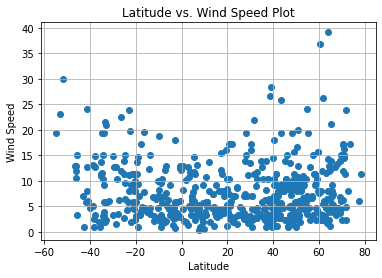

In [23]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.grid()
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Figure 4.png")
plt.show()

## Linear Regression

In [16]:
#creating function to create linear regression plots
def Linear_Regression(x,y):
    #calculating correlation coefficient
    cor_coeff = st.pearsonr(x,y)
    #calculating linear regression
    slope,intercept,rvalue,pvalue,stderr = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Correlation is {round(cor_coeff[0],2)}")
    print(f"The r-squared is {round(rvalue ** 2)}")
    #plotting linear regression on top of scatter plot
    plt.scatter(x,y)
    plt.plot(x,regress_value, "r-")
    return line_eq



In [17]:
#creating dataframes for northern and southern hemispheres
northern_hemisphere = city_df.loc[city_df["Lat"]>= 0]
northern_hemisphere

southern_hemisphere = city_df.loc[city_df["Lat"]< 0]
southern_hemisphere

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,39.43,85,48,4.74,AR,1603927261
1,Punta Arenas,-53.15,-70.92,48.00,66,89,25.99,CL,1603927812
2,East London,-33.02,27.91,67.84,84,97,1.70,ZA,1603927813
5,New Norfolk,-42.78,147.06,64.00,56,5,1.99,AU,1603927813
6,Atuona,-9.80,-139.03,77.72,75,52,12.64,PF,1603927813
...,...,...,...,...,...,...,...,...,...
536,Katobu,-4.94,122.53,85.59,58,68,3.85,ID,1603927920
537,Lakes Entrance,-37.88,147.98,66.00,67,4,1.99,AU,1603927921
542,Luebo,-5.35,21.42,69.80,94,91,1.72,CD,1603927921
548,Manjacaze,-24.71,33.88,67.24,95,0,7.20,MZ,1603927922


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation is -0.86
The r-squared is 1.0


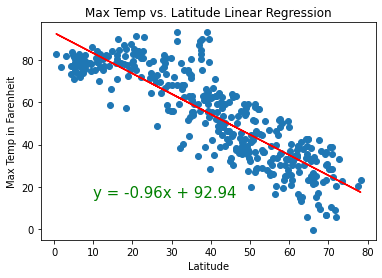

In [20]:
northern_hem_plot = Linear_Regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.annotate(northern_hem_plot, (10,15), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Farenheit")
plt.title("Max Temp vs. Latitude Linear Regression in Northern Hemisphere")
plt.savefig("Figure 5.png")

# ANALYSIS: As the latitude in the northern hemisphere increases the temperature decreases which results in a strong negative correlation because r-squared is equal to 1 and the correlation is -0.86.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation is 0.73
The r-squared is 1.0


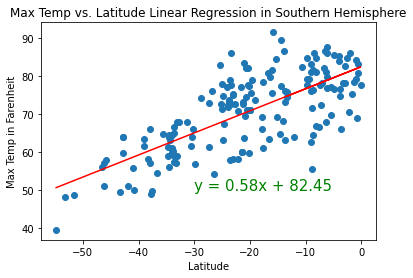

In [43]:
southern_hem_plot = Linear_Regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.annotate(southern_hem_plot, (-30,50), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Farenheit")
plt.title("Max Temp vs. Latitude Linear Regression in Southern Hemisphere")
plt.savefig("Figure 6.png")

# ANALYSIS: As the latitude increases in the southern hemisphere so does the temperature which results in a strong positive correlation where the r-square is equal to 1 and the correlation is 0.77.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation is 0.28
The r-squared is 0.0


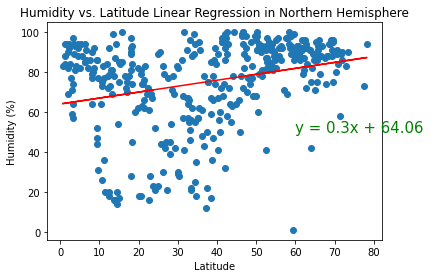

In [31]:
northern_hem_plot = Linear_Regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.annotate(northern_hem_plot, (60,50), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression in Northern Hemisphere")
plt.savefig("Figure 7.png")

# ANALYSIS: There is relatively no correlation between the increase in latitude and the increase in humidity resulting in a very weak positive correlation of 0.28 with an r-square of 0.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation is 0.14
The r-squared is 0.0


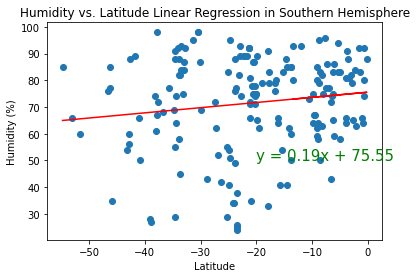

In [30]:
southern_hem_plot = Linear_Regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.annotate(southern_hem_plot, (-20,50), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression in Southern Hemisphere")
plt.savefig("Figure 8.png")

# ANALYSIS: There is no correlation between the increase in latitude and the increase in humidity in the southern hemisphere because the correlation is 0.14 which results in a very weak positive correlation with an r-square of 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation is 0.16
The r-squared is 0.0


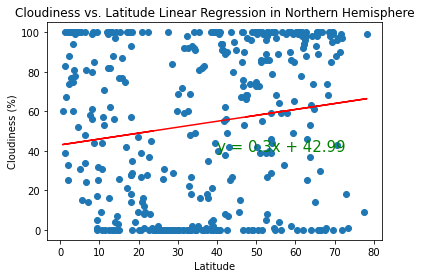

In [32]:
northern_hem_plot = Linear_Regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.annotate(northern_hem_plot, (40,40), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression in Northern Hemisphere")
plt.savefig("Figure 9.png")

# ANALYSIS: There is no correlation between the increase in latitude and the increase in cloudiness in the northern hemisphere because the correlation is 0.16 and r-square is 0.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation is 0.16
The r-squared is 0.0


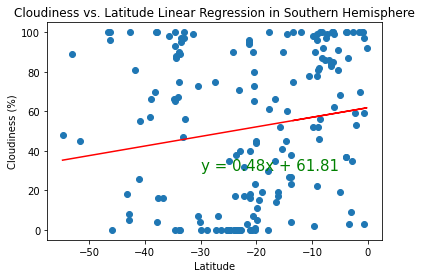

In [39]:
southern_hem_plot = Linear_Regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.annotate(southern_hem_plot, (-30,30), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression in Southern Hemisphere")
plt.savefig("Figure 10.png")

# ANALYSIS: There is no correlation between the increase in latitude in the southern hemisphere and increase in cloudiness because the correlation is 0.16 and r-square is 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation is 0.14
The r-squared is 0.0


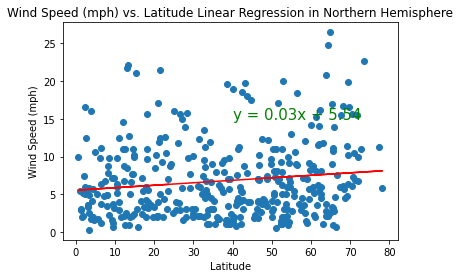

In [40]:
northern_hem_plot = Linear_Regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.annotate(northern_hem_plot, (40,15), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude Linear Regression in Northern Hemisphere")
plt.savefig("Figure 11.png")

# ANALYSIS: As the latitude increases in the northern hemisphere the wind speed stays relatively the same. Because the correlation is 0.14 and the r-square is 0 there is a weak positive relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation is -0.22
The r-squared is 0.0


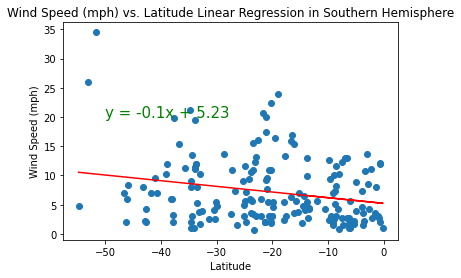

In [42]:
southern_hem_plot = Linear_Regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.annotate(southern_hem_plot, (-50,20), fontsize=15, color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude Linear Regression in Southern Hemisphere")
plt.savefig("Figure 12.png")

# ANALAYSIS: There is a weak negative relationship between the increase of latitude and the increase of wind speed because the correlation is -0.22 with an r-square of 0.

# OVERALL FINDINGS: There was a very strong negative relationship between the increase in latitude and the decrease in temperature which would cause very cold temperatures the higher the latitude.